In [1]:
!pip install pandas matplotlib seaborn scikit-learn

  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     --------- ----------------------------- 41.0/165.9 kB 2.0 MB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.4 MB/s eta 0:00:00
  Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
    --------------------------------------- 0.1/7.8 MB 7.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install reportlab


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.9 MB 1.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.9 MB 1.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/1.9 MB 2.0 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.9 MB 2.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/1.9 MB 2.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/1.9 MB 2.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.9 MB 2.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/1.9 MB 2.3 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/1.9 MB 2.4 MB/s eta 0:00:01
   ----------------------- ---------------- 1.1/1.9 MB 2.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/1.9 MB 2.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.4/1.9 MB 2.4 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


importing all the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

Matplotlib is building the font cache; this may take a moment.


the module for Data ingestion

In [5]:
import os 
file_path=r'C:\Users\Hp\Desktop\olympics2024.csv'
file_extension = os.path.splitext(file_path)[1].lower()
        
if file_extension == '.csv':
    df = pd.read_csv(file_path)
elif file_extension == '.json':
    df = pd.read_json(file_path)
elif file_extension in ['.xls', '.xlsx']:
    df = pd.read_excel(file_path)
else:
    raise ValueError(f"Unsupported file format: {file_extension}")


Now we start with data preprocessing and cleaning (seeing all the nuances in the data, removing unnecessary data and then sending it for processing)

In [6]:

df.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [33]:
print(df)

    Rank        Country Country Code  Gold  Silver  Bronze  Total
0      1  United States           US    40      44      42    126
1      2          China          CHN    40      27      24     91
2      3          Japan          JPN    20      12      13     45
3      4      Australia          AUS    18      19      16     53
4      5         France          FRA    16      26      22     64
..   ...            ...          ...   ...     ...     ...    ...
86    84           Peru          PER     0       0       1      1
87    84          Qatar          QAT     0       0       1      1
88    84      Singapore          SIN     0       0       1      1
89    84       Slovakia          SVK     0       0       1      1
90    84         Zambia          ZAM     0       0       1      1

[91 rows x 7 columns]


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


Dropping the column country code as it is not needed (as it is a comparatively small dataset we can choose to ignore deleting these columns )

In [7]:
df=df.drop(df.columns[[2]],axis=1)

In [36]:
df.head()

,Rank,Country,Gold,Silver,Bronze,Total
0,1,United States,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France,16,26,22,64


Descriptional analysis


In [15]:
df.describe()

,Rank,Gold,Silver,Bronze,Total,Cluster
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582,0.142857
std,25.652244,6.990278,6.770816,6.558798,19.702829,0.410188
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000,0.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000,0.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000,2.000000


Clustering analysis


In [10]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


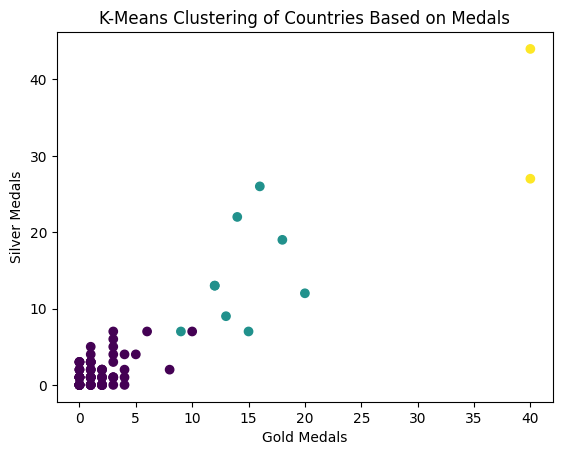

In [11]:
X = df[['Gold', 'Silver', 'Bronze']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(df['Gold'], df['Silver'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Gold Medals')
plt.ylabel('Silver Medals')
plt.title('K-Means Clustering of Countries Based on Medals')
plt.show()

Regression analysis


In [13]:
X = df[['Gold', 'Silver', 'Bronze']]
y = df['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
model_score = model.score(X_test, y_test)

mae, model_score

(9.98032066347246e-15, 1.0)

Pairplot 

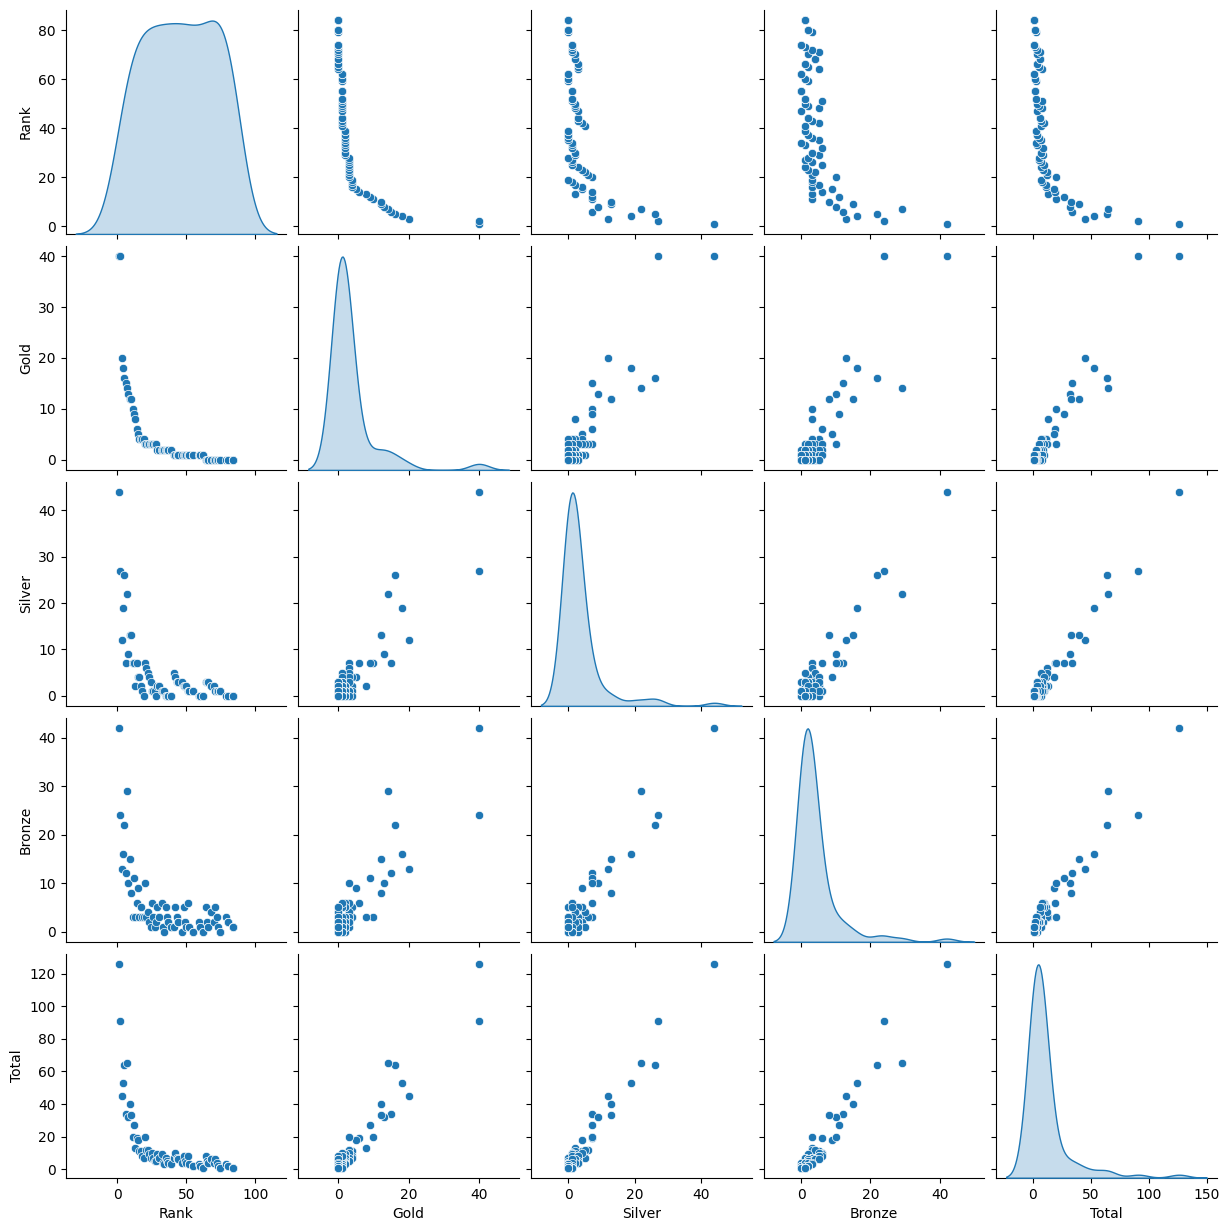

In [38]:
sns.pairplot(df, vars=["Rank", "Gold", "Silver", "Bronze","Total"], diag_kind="kde")
plt.show()

For report generation we can write codes that present us with different queries(such as medal count,total number of countries etc and create a pdf file accordingly all with the help of some external libraries imported below )

In [44]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas

def visualizations(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country', y='Total', data=df.sort_values('Total', ascending=False).head(10))
    plt.title('Top 10 Countries by Total Medals')
    plt.xticks(rotation=90)
    plt.savefig('top_countries_medals.png')
    plt.close()



    

def report(df, file_name=r'C:\Users\Hp\Desktop\file\.venv\olympics_report.pdf'):
    visualizations(df)
    summary = print(f"""
    Olympic Games Report:
    
    Total number of countries: {df['Country'].nunique()}
    Average number of medals won: {df['Total'].mean():.2f}
    Country with the most medals: {df.iloc[df['Total'].idxmax()]['Country']}
    """)
    
    
    c = canvas.Canvas(file_name, pagesize=A4)
    width, height = A4
    
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, height - 100, "Olympic Games Analysis Report")

    c.setFont("Helvetica", 12)
    text = c.beginText(100, height - 150)
    text.textLines(summary)
    c.drawText(text)
    
    c.drawImage('top_countries_medals.png', 100, height - 400, width=400, height=250)
    
    c.save()
    print(f"Report generated and saved as {file_name}")


    




In [31]:
report(df)

Report generated and saved as C:\Users\Hp\Desktop\file\.venv\olympics_report.pdf


Setting up the command line interface using natural lang processing 

In [40]:
!pip install -U nltk



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import nltk 
from nltk.tokenize import word_tokenize
import argparse 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import *
nltk.download('punkt')
nltk.download('stopwords')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def process_query(query):
    tokens = word_tokenize(query.lower())
    filtered_tokens = [ps.stem(w) for w in tokens if w not in stop_words]
    return filtered_tokens

def handle_query(query, df):
    tokens = process_query(query)
    
    if "report" in tokens:
        report(df)
    elif "visualization" in tokens or "plot" in tokens:
        visualizations(df)
    elif "summary" in tokens:
        summary = summary(df)
        print(summary)
    else:
        print("Sorry, I didn't understand your query. Please try again.")

def cli():
    parser = argparse.ArgumentParser(description="AI CLI for Olympic Games Data Analysis")
    parser.add_argument('--query', type=str, help="Your query for the AI (e.g., 'Generate a report')")
    args = parser.parse_args()
    
    # Load your dataset here
    df = pd.read_csv(r'C:\Users\Hp\Desktop\olympics2024.csv')
    
    if args.query:
        handle_query(args.query, df)
    else:
        print("Please provide a query using the --query argument.")

# Example usage:
# python cli.py --query "Generate a report"



AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)